# 8장 MNIST를 활용한 숫자 인식

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

In [2]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [2]:
# 파이토치 관련 라이브러리

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [3]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

## 8.4 활성화 함수와 ReLU 함수

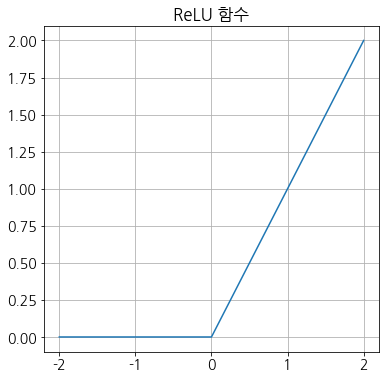

In [4]:
# ReLU 함수의 그래프

relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU 함수')
plt.show()

## 8.5 GPU 사용하기

### GPU 디바이스 확인

In [4]:
# 디바이스 할당
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [6]:
# 텐서 변수 x, y 
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

# x와 y 사이의 연산
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


In [7]:
# 변수 x를 GPU로 보냄
x = x.to(device)

# 변수 x와 y의 디바이스 속성 확인
print('x: ', x.device)
print('y: ', y.device)

x:  cuda:0
y:  cpu


In [8]:
# 이 상태에서 x와 y의 연산을 수행하면...

z = x * y

RuntimeError: ignored

In [9]:
# y도 GPU로 보냄
y = y.to(device)

# 연산이 가능해짐
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


## 8.8 데이터 준비 1  (Dataset을 활용해 불러오기)

In [5]:
# 라이브러리 임포트
import torchvision.datasets as datasets

# 다운로드받을 디렉터리명
data_root = './data'

train_set0 = datasets.MNIST(
    # 원본 데이터를 다운로드받을 디렉터리 지정
    root = data_root,  
    # 훈련 데이터인지 또는 검증 데이터인지
    train = True,  
    # 원본 데이터가 없는 경우, 다운로드를 실행하는지 여부
    download = True)

In [6]:
# 다운로드한 파일 확인

!ls -lR ./data/MNIST

./data/MNIST:
total 4
drwxr-xr-x 2 root root 4096 Apr  3 09:44 raw

./data/MNIST/raw:
total 65008
-rw-r--r-- 1 root root  7840016 Apr  3 09:44 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Apr  3 09:44 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Apr  3 09:44 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Apr  3 09:44 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Apr  3 09:44 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Apr  3 09:44 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Apr  3 09:44 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Apr  3 09:44 train-labels-idx1-ubyte.gz


In [7]:
# 데이터 건수 확인
print('데이터 건수: ', len(train_set0))

# 첫번째 요소 가져오기
image, label = train_set0[0]

# 데이터 타입 확인
print('입력 데이터 타입 : ', type(image))
print('정답 데이터 타입 : ', type(label))

데이터 건수:  60000
입력 데이터 타입 :  <class 'PIL.Image.Image'>
정답 데이터 타입 :  <class 'int'>


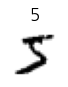

In [8]:
# 입력 데이터를 이미지로 출력

plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

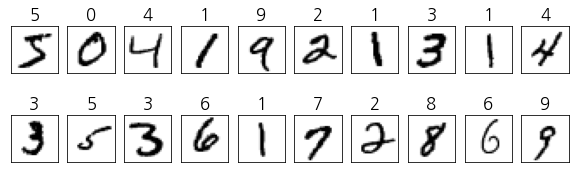

In [9]:
# 정답 데이터와 함께 처음 20개 데이터를 이미지로 출력

plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)
    
    # image와 label 취득
    image, label = train_set0[i]
    
    # 이미지 출력
    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 8.9 데이터 준비 2  (Transforms를 활용한 데이터 전처리)

### 스텝 1. ToTensor 사용하기

In [10]:
# 라이브러리 임포트
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root=data_root,  train=True,  download=True,
    transform = transform1)

In [11]:
# 변환 결과 확인

image, label = train_set1[0]
print('입력 데이터 타입 : ', type(image))
print('입력 데이터 shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

입력 데이터 타입 :  <class 'torch.Tensor'>
입력 데이터 shape :  torch.Size([1, 28, 28])
최솟값 :  tensor(0.)
최댓값 :  tensor(1.)


### 스텝 2. Normalize 사용하기

In [12]:
transform2 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),
    
    # 데이터 정규화
    transforms.Normalize(0.5,  0.5),
])

train_set2 = datasets.MNIST(
    root = data_root,  train = True,  download = True,
    transform = transform2)

In [13]:
# 변환 결과 확인

image, label = train_set2[0]
print('shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

shape :  torch.Size([1, 28, 28])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


### 스텝 3. Lambda 클래스를 사용해 1차원으로 텐서 변환하기

In [14]:
transform3 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),
    
    # 데이터 정규화
    transforms.Normalize(0.5, 0.5),
    
    # 현재 텐서를 1계 텐서로 변환
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set3 = datasets.MNIST(
    root = data_root,  train = True,  
    download=True, transform = transform3)

In [15]:
# 변환 결과 확인

image, label = train_set3[0]
print('shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

shape :  torch.Size([784])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


### 최종 구현 형태

In [16]:
# 데이터 변환용 함수 Transforms
# (1) Image를 텐서화
# (2) [0, 1] 범위의 값을 [-1, 1] 범위로 조정
# (3) 데이터의 shape을 [1, 28, 28] 에서 [784] 로 변환

transform = transforms.Compose([
    # (1) 데이터를 텐서로 변환
    transforms.ToTensor(),
    
    # (2) 데이터 정규화
    transforms.Normalize(0.5, 0.5),
    
    # (3) 1계 텐서로 변환
    transforms.Lambda(lambda x: x.view(-1)),
])

In [17]:
# 데이터 입수를 위한 Dataset 함수

# 훈련용 데이터셋 정의
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# 검증용 데이터셋 정의
test_set = datasets.MNIST(
    root = data_root, train = False, 
    download = True, transform = transform)

## 8.10 데이터 준비 3  (데이터로더를 활용한 미니 배치 데이터 생성)

In [18]:
# 라이브러리 임포트
from torch.utils.data import DataLoader

# 미니 배치 사이즈 지정
batch_size = 500

# 훈련용 데이터로더
# 훈련용이므로, 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size, 
    shuffle = True)

# 검증용 데이터로더
# 검증시에는 셔플을 필요로하지 않음
test_loader = DataLoader(
    test_set,  batch_size = batch_size, 
    shuffle = False)

In [19]:
# 몇 개의 그룹으로 데이터를 가져올 수 있는가
print(len(train_loader))

# 데이터로더로부터 가장 처음 한 세트를 가져옴
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


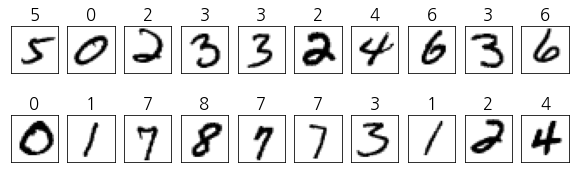

In [20]:
# 이미지 출력
plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)
    
    # 넘파이로 배열로 변환
    image = images[i].numpy()
    label = labels[i]
    
    # 이미지의 범위를 [0, 1] 로 되돌림
    image2 = (image + 1)/ 2

    # 이미지 출력
    plt.imshow(image2.reshape(28, 28),cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

모두 60,000건의 훈련 데이터가 120개의 그룹으로 분할되었음을 알 수 있다.
이번에는 테스트용으로 셔플을 하지 않은 데이터를 정의했지만, 훈련 데이터는 한번 취득할 때 마다 셔플이 이뤄진다.

## 8.11 모델 정의

In [21]:
# 입력 차원수
n_input = image.shape[0]

# 출력 차원수
# 분류 클래스 수는 10
n_output = len(set(list(labels.data.numpy())))

# 은닉층의 노드 수
n_hidden = 128

# 결과 확인
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

n_input: 784  n_hidden: 128 n_output: 10


In [22]:
# 모델 정의
# 784입력 10출력 1은닉층의 신경망 모델

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 은닉층 정의(은닉층 노드 수 : n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 출력층 정의
        self.l2 = nn.Linear(n_hidden, n_output)

        # ReLU 함수 정의
        self.relu = nn.ReLU(inplace=True)
   
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [23]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 인스턴스 생성
net = Net(n_input, n_output, n_hidden)

# 모델을 GPU로 전송
net = net.to(device)

### 최적화 알고리즘과 손실 함수

In [24]:
# 학습률
lr = 0.01

# 최적화 알고리즘: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

### 모델 확인

In [25]:
# 모델 내부 파라미터 확인
# l1.weight, l1.bias, l2.weight, l2.bias를 확인할 수 있음

for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0277,  0.0200,  0.0315],
        [ 0.0184, -0.0322,  0.0175,  ...,  0.0089, -0.0028, -0.0033],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0322, -0.0059, -0.0169],
        [-0.0328, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.0325, -0.0298,  0.0013,  0.0199,  0.0268, -0.0248, -0.0172, -0.0355,
         0.0122, -0.0048,  0.0214,  0.0202, -0.0243,  0.0015, -0.0276,  0.0296,
         0.0341, -0.0228,  0.0230,  0.0347, -0.0091, -0.0346,  0.0206, -0.0060,
         0.0329,  0.0047,  0.0180,  0.0101,  0.0177, -0.0309,  0.0228, -0.0224,
         0.0321,  0.0179,  0.0321,  0.0184,  0.0219, -0.0089,  0.0310, -0.0039,
        -0.0074, -0.0317,  0.0192, -0.0021,  0.0190

In [26]:
# 모델 개요 표시 1

print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [27]:
# 모델 개요 표시 2

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      --                        --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [10]                      1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 12.87
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.41
Estimated Total Size (MB): 0.41

## 8.12 경사 하강법

### 예측 계산

In [28]:
# 훈련 데이터셋의 가장 처음 항목을 취득
# 데이터로더에서 가장 처음 항목을 취득
for images, labels in train_loader:
    break 

In [29]:
# 데이터로더에서 취득한 데이터를 GPU로 보냄
inputs = images.to(device)
labels = labels.to(device)

In [30]:
# 예측 계산
outputs = net(inputs)

# 결과 확인
print(outputs)

tensor([[-0.3622, -0.1927, -0.0179,  ...,  0.1073,  0.1025, -0.0615],
        [-0.4072, -0.1814,  0.0716,  ...,  0.1866,  0.1975,  0.1161],
        [-0.3221, -0.0547, -0.2868,  ...,  0.1967, -0.0103,  0.1591],
        ...,
        [-0.2091, -0.1058,  0.2365,  ...,  0.1360,  0.0665,  0.0987],
        [-0.2756, -0.2012,  0.1703,  ...,  0.1223,  0.2388,  0.0233],
        [-0.3045, -0.2458,  0.1416,  ...,  0.1012,  0.0820, -0.1457]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


### 손실 함수

#### 손실 계산과 계산 그래프 시각화

2.3328874111175537


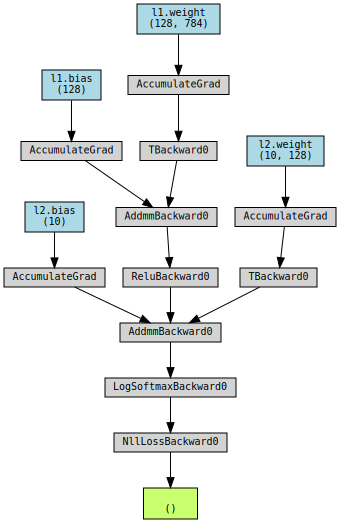

In [31]:
#  손실 계산
loss = criterion(outputs, labels)

# 손실값 가져오기
print(loss.item())

# 손실 계산 그래프 시각화
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

### 경사 계산

In [32]:
# 경사 계산 실행
loss.backward()

In [33]:
# 경사 계산 결과
w = net.to('cpu')
print(w.l1.weight.grad.numpy())
print(w.l1.bias.grad.numpy())
print(w.l2.weight.grad.numpy())
print(w.l2.bias.grad.numpy())

[[-0.0007 -0.0007 -0.0007 ... -0.0007 -0.0007 -0.0007]
 [ 0.0077  0.0077  0.0077 ...  0.0077  0.0077  0.0077]
 [-0.0018 -0.0018 -0.0018 ... -0.0018 -0.0018 -0.0018]
 ...
 [-0.0008 -0.0008 -0.0008 ... -0.0008 -0.0008 -0.0008]
 [ 0.0011  0.0011  0.0011 ...  0.0011  0.0011  0.0011]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]]
[ 0.0007 -0.0077  0.0018  0.0008 -0.      0.      0.0014 -0.0008  0.0025
 -0.0016  0.0009 -0.002   0.0006  0.0025 -0.0026  0.0008  0.0061 -0.0011
 -0.0018  0.008   0.0063  0.0026 -0.0036  0.0056 -0.0006 -0.0038  0.0034
  0.     -0.0026 -0.0032 -0.0006  0.0034  0.0018  0.      0.0001  0.0002
  0.0047 -0.0012  0.0022  0.0018  0.0037 -0.0061  0.0011  0.0097 -0.0017
 -0.0012 -0.0004 -0.001  -0.0031 -0.0003 -0.0008  0.0004  0.0001 -0.0016
 -0.002  -0.0001 -0.0006 -0.0024 -0.0004  0.0029  0.0013 -0.0085  0.0013
  0.0015  0.     -0.0006  0.004  -0.0016 -0.0052  0.0003 -0.0031  0.0001
  0.0009 -0.0017 -0.0069 -0.0028  0.0017 -0.003   0.0012  0.0024  0.0011
 -0.002

### 파라미터 수정

In [34]:
# 경사 하강법 적용
optimizer.step()

In [35]:
# 파라미터 값 출력
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0278,  0.0200,  0.0316],
        [ 0.0183, -0.0322,  0.0174,  ...,  0.0088, -0.0029, -0.0034],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0323, -0.0059, -0.0169],
        [-0.0329, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       requires_grad=True)
Parameter containing:
tensor([ 3.2475e-02, -2.9682e-02,  1.2742e-03,  1.9874e-02,  2.6836e-02,
        -2.4759e-02, -1.7201e-02, -3.5517e-02,  1.2199e-02, -4.7449e-03,
         2.1379e-02,  2.0187e-02, -2.4297e-02,  1.4928e-03, -2.7613e-02,
         2.9618e-02,  3.4051e-02, -2.2777e-02,  2.2983e-02,  3.4580e-02,
        -9.1870e-03, -3.4619e-02,  2.0599e-02, -6.0632e-03,  3.2937e-02,
         4.7784e-03,  1.7949e-02,  1.0102e-02,  1.7700e-02, -3.0853e-02,
         2.2817e-02, -2.2391e-02,  3.2049e-02,  1.7890e-0

### 반복 계산

In [36]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history = np.zeros((0,5))

In [37]:
# tqdm 라이브러리 임포트
from tqdm.notebook import tqdm

# 반복 계산 메인 루프
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # 훈련 페이즈
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPU로 전송
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        # 경사 초기화
        optimizer.zero_grad()

        # 예측 계산
        outputs = net(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 경사 계산
        loss.backward()
    
        # 파라미터 수정
        optimizer.step()

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 손실과 정확도 계산
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    # 예측 페이즈
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

            
        # 예측 계산
        outputs_test = net(inputs_test)

        # 손실 계산
        loss_test = criterion(outputs_test, labels_test)

        # 예측 라벨 산출
        predicted_test = torch.max(outputs_test, 1)[1]

        # 손실과 정확도 계산
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/100], loss: 1.82932 acc: 0.56960 val_loss: 1.32629, val_acc: 0.74660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/100], loss: 1.03889 acc: 0.79537 val_loss: 0.79661, val_acc: 0.83180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.70809 acc: 0.84110 val_loss: 0.60256, val_acc: 0.85850


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.57300 acc: 0.86057 val_loss: 0.51192, val_acc: 0.87140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.50223 acc: 0.87102 val_loss: 0.45827, val_acc: 0.87930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.45883 acc: 0.87877 val_loss: 0.42422, val_acc: 0.88650


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.42938 acc: 0.88327 val_loss: 0.40076, val_acc: 0.88970


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.40813 acc: 0.88743 val_loss: 0.38285, val_acc: 0.89370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.39176 acc: 0.89063 val_loss: 0.36857, val_acc: 0.89680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.37876 acc: 0.89313 val_loss: 0.35741, val_acc: 0.89930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.36812 acc: 0.89593 val_loss: 0.34868, val_acc: 0.90160


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.35909 acc: 0.89787 val_loss: 0.34089, val_acc: 0.90220


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.35147 acc: 0.89977 val_loss: 0.33336, val_acc: 0.90490


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.34476 acc: 0.90130 val_loss: 0.32806, val_acc: 0.90570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.33860 acc: 0.90310 val_loss: 0.32334, val_acc: 0.90720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.33333 acc: 0.90412 val_loss: 0.31807, val_acc: 0.90790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.32843 acc: 0.90522 val_loss: 0.31445, val_acc: 0.90930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.32380 acc: 0.90702 val_loss: 0.31076, val_acc: 0.91090


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.31950 acc: 0.90808 val_loss: 0.30587, val_acc: 0.91190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.31587 acc: 0.90902 val_loss: 0.30281, val_acc: 0.91240


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.31199 acc: 0.91033 val_loss: 0.29965, val_acc: 0.91520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.30842 acc: 0.91098 val_loss: 0.29713, val_acc: 0.91430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.30508 acc: 0.91193 val_loss: 0.29433, val_acc: 0.91560


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.30191 acc: 0.91320 val_loss: 0.29124, val_acc: 0.91780


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.29883 acc: 0.91405 val_loss: 0.28884, val_acc: 0.91710


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.29598 acc: 0.91493 val_loss: 0.28646, val_acc: 0.91820


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.29311 acc: 0.91660 val_loss: 0.28366, val_acc: 0.91960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.29027 acc: 0.91695 val_loss: 0.28186, val_acc: 0.91990


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.28766 acc: 0.91798 val_loss: 0.28043, val_acc: 0.91950


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.28511 acc: 0.91858 val_loss: 0.27748, val_acc: 0.92110


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.28234 acc: 0.91957 val_loss: 0.27486, val_acc: 0.92190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.27989 acc: 0.92043 val_loss: 0.27256, val_acc: 0.92120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.27763 acc: 0.92070 val_loss: 0.27011, val_acc: 0.92200


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.27514 acc: 0.92105 val_loss: 0.26899, val_acc: 0.92400


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.27278 acc: 0.92240 val_loss: 0.26670, val_acc: 0.92440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.27048 acc: 0.92282 val_loss: 0.26464, val_acc: 0.92360


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.26829 acc: 0.92348 val_loss: 0.26282, val_acc: 0.92440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.26598 acc: 0.92405 val_loss: 0.26078, val_acc: 0.92540


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.26357 acc: 0.92445 val_loss: 0.25921, val_acc: 0.92580


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.26158 acc: 0.92572 val_loss: 0.25722, val_acc: 0.92660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.25919 acc: 0.92600 val_loss: 0.25560, val_acc: 0.92640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.25715 acc: 0.92693 val_loss: 0.25285, val_acc: 0.92730


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.25497 acc: 0.92758 val_loss: 0.25102, val_acc: 0.92940


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.25292 acc: 0.92768 val_loss: 0.24996, val_acc: 0.92790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.25096 acc: 0.92842 val_loss: 0.24744, val_acc: 0.92930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.24868 acc: 0.92933 val_loss: 0.24637, val_acc: 0.93070


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.24664 acc: 0.92967 val_loss: 0.24404, val_acc: 0.93100


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.24464 acc: 0.93035 val_loss: 0.24266, val_acc: 0.93060


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.24267 acc: 0.93058 val_loss: 0.24012, val_acc: 0.93220


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.24070 acc: 0.93143 val_loss: 0.23929, val_acc: 0.93250


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.23872 acc: 0.93208 val_loss: 0.23708, val_acc: 0.93300


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.23681 acc: 0.93230 val_loss: 0.23567, val_acc: 0.93290


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.23485 acc: 0.93347 val_loss: 0.23360, val_acc: 0.93330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.23295 acc: 0.93445 val_loss: 0.23177, val_acc: 0.93440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.23101 acc: 0.93478 val_loss: 0.22989, val_acc: 0.93460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.22909 acc: 0.93520 val_loss: 0.22864, val_acc: 0.93460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.22729 acc: 0.93572 val_loss: 0.22641, val_acc: 0.93590


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.22537 acc: 0.93642 val_loss: 0.22547, val_acc: 0.93570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.22367 acc: 0.93697 val_loss: 0.22323, val_acc: 0.93600


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.22190 acc: 0.93747 val_loss: 0.22191, val_acc: 0.93640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.22019 acc: 0.93803 val_loss: 0.22011, val_acc: 0.93720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.21846 acc: 0.93837 val_loss: 0.21884, val_acc: 0.93780


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.21654 acc: 0.93895 val_loss: 0.21656, val_acc: 0.93710


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.21487 acc: 0.93965 val_loss: 0.21577, val_acc: 0.93900


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.21322 acc: 0.94007 val_loss: 0.21334, val_acc: 0.93830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.21153 acc: 0.94047 val_loss: 0.21217, val_acc: 0.93890


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.20997 acc: 0.94110 val_loss: 0.21143, val_acc: 0.93960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.20827 acc: 0.94157 val_loss: 0.20924, val_acc: 0.94010


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.20674 acc: 0.94210 val_loss: 0.20717, val_acc: 0.94000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.20500 acc: 0.94242 val_loss: 0.20684, val_acc: 0.94000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.20353 acc: 0.94292 val_loss: 0.20486, val_acc: 0.94080


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.20199 acc: 0.94353 val_loss: 0.20379, val_acc: 0.94120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.20053 acc: 0.94370 val_loss: 0.20211, val_acc: 0.94110


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.19892 acc: 0.94422 val_loss: 0.20088, val_acc: 0.94230


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.19755 acc: 0.94448 val_loss: 0.19896, val_acc: 0.94270


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.19588 acc: 0.94513 val_loss: 0.19794, val_acc: 0.94280


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.19455 acc: 0.94537 val_loss: 0.19672, val_acc: 0.94330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.19313 acc: 0.94565 val_loss: 0.19521, val_acc: 0.94430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.19164 acc: 0.94618 val_loss: 0.19406, val_acc: 0.94420


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.19042 acc: 0.94637 val_loss: 0.19306, val_acc: 0.94350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.18892 acc: 0.94718 val_loss: 0.19192, val_acc: 0.94340


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.18765 acc: 0.94737 val_loss: 0.19040, val_acc: 0.94470


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.18622 acc: 0.94793 val_loss: 0.18893, val_acc: 0.94570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.18489 acc: 0.94815 val_loss: 0.18788, val_acc: 0.94480


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.18359 acc: 0.94822 val_loss: 0.18693, val_acc: 0.94590


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.18230 acc: 0.94887 val_loss: 0.18560, val_acc: 0.94620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.18102 acc: 0.94955 val_loss: 0.18465, val_acc: 0.94570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.17978 acc: 0.94978 val_loss: 0.18369, val_acc: 0.94700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.17848 acc: 0.95020 val_loss: 0.18186, val_acc: 0.94690


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.17739 acc: 0.95037 val_loss: 0.18092, val_acc: 0.94740


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.17613 acc: 0.95100 val_loss: 0.17955, val_acc: 0.94790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.17490 acc: 0.95113 val_loss: 0.17921, val_acc: 0.94800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.17384 acc: 0.95143 val_loss: 0.17747, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.17266 acc: 0.95172 val_loss: 0.17637, val_acc: 0.94800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.17145 acc: 0.95215 val_loss: 0.17558, val_acc: 0.94900


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.17037 acc: 0.95277 val_loss: 0.17471, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.16916 acc: 0.95272 val_loss: 0.17390, val_acc: 0.94830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.16812 acc: 0.95322 val_loss: 0.17417, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.16698 acc: 0.95357 val_loss: 0.17148, val_acc: 0.94830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.16584 acc: 0.95405 val_loss: 0.17070, val_acc: 0.94950


## 8.13 결과 확인

In [38]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

초기상태 : 손실 : 1.32629  정확도 : 0.74660
최종상태 : 손실 : 0.17070  정확도 : 0.94950


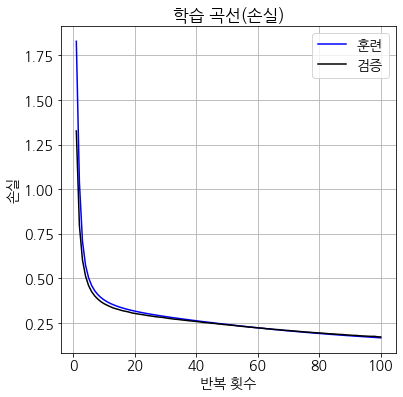

In [39]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b', label='훈련')
plt.plot(history[:,0], history[:,3], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

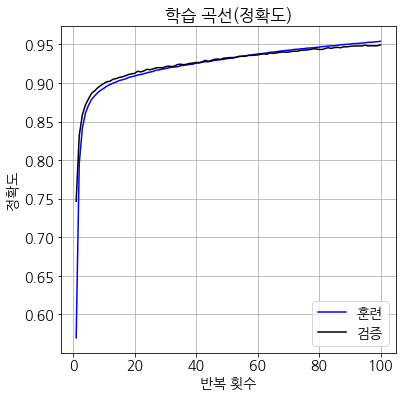

In [40]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,2], 'b', label='훈련')
plt.plot(history[:,0], history[:,4], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()

### 이미지 출력 확인

In [52]:
# 데이터로더에서 처음 한 세트 가져오기
for images, labels in test_loader:
    break

# 예측 결과 가져오기
inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]

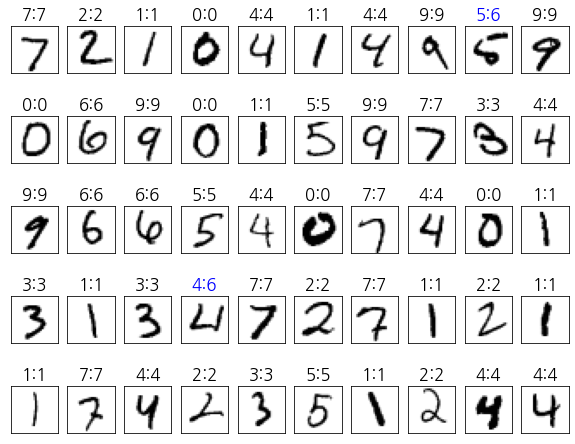

In [53]:
# 처음 50건의 이미지에 대해 "정답:예측"으로 출력

plt.figure(figsize=(10, 8))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
    
  # 넘파이 배열로 변환
  image = images[i]
  label = labels[i]
  pred = predicted[i]
  if (pred == label):
    c = 'k'
  else:
    c = 'b'
    
  # 이미지의 범위를 [0, 1] 로 되돌림
  image2 = (image + 1)/ 2
    
  # 이미지 출력
  plt.imshow(image2.reshape(28, 28),cmap='gray_r')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## 8.14 은닉층 추가하기

In [41]:
# 모델 정의
# 784입력 10출력을 갖는 2개의 은닉층을 포함한 신경망

class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        
        # 첫번째 은닉층 정의(은닉층 노드 수: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 두번째 은닉층 정의(은닉층 노드 수: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # 출력층 정의
        self.l3 = nn.Linear(n_hidden, n_output)

        # ReLU 함수 정의
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [42]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 초기화
net = Net2(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [43]:
# 모델 개요 표시 1

print(net)

Net2(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [44]:
# 모델 개요 표시 2

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net2                                     --                        --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [128]                     16,512
├─ReLU: 1-4                              [128]                     --
├─Linear: 1-5                            [10]                      1,290
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
Total mult-adds (M): 14.99
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.47
Estimated Total Size (MB): 0.48

In [45]:
# 데이터로더에서 처음 한 세트 가져오기
for images, labels in test_loader:
    break

# 예측 결과 가져오기
inputs = images.to(device)
labels = labels.to(device)

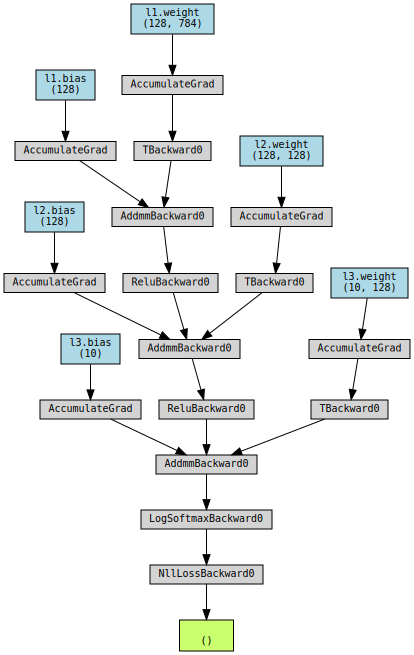

In [46]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels)

# 손실 계산 그래프 시각화
make_dot(loss, params=dict(net.named_parameters()))

### 경사 계산

In [47]:
# 경사 계산
loss.backward()

# 경사 계산 결과 일부
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 각 요소의 절댓값 평균
print(np.abs(w).mean())

[[-0.0007 -0.0007 -0.0007 ... -0.0007 -0.0007 -0.0007]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]
 [-0.0005 -0.0005 -0.0005 ... -0.0005 -0.0005 -0.0005]
 ...
 [ 0.0015  0.0015  0.0015 ...  0.0015  0.0015  0.0015]
 [ 0.0002  0.0002  0.0002 ...  0.0002  0.0002  0.0002]
 [ 0.0003  0.0003  0.0003 ...  0.0003  0.0003  0.0003]]
0.0008487979


### 반복 계산

In [48]:
# 난수 고정
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True


# 모델 초기화
net = Net2(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history2 = np.zeros((0,5))

In [49]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    val_acc = 0
    val_loss = 0
    n_train = 0
    n_test = 0

    # 훈련 페이즈
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPU로 전송
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        # 경사 초기화
        optimizer.zero_grad()

        # 예측 계산
        outputs = net(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 경사 계산
        loss.backward()
    
        # 파라미터 수정
        optimizer.step()

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 손실과 정확도 계산
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    # 예측 페이즈
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        # 예측 계산
        outputs_test = net(inputs_test)

        # 손실 계산
        loss_test = criterion(outputs_test, labels_test)

        # 예측 라벨 산출
        predicted_test = torch.max(outputs_test, 1)[1]

        # 손실과 정확도 계산
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history2 = np.vstack((history2, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/100], loss: 2.20163 acc: 0.25380 val_loss: 2.04576, val_acc: 0.49800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/100], loss: 1.75820 acc: 0.60443 val_loss: 1.39272, val_acc: 0.68680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/100], loss: 1.11284 acc: 0.75647 val_loss: 0.86511, val_acc: 0.80810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.75170 acc: 0.82292 val_loss: 0.63477, val_acc: 0.84380


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.59030 acc: 0.84985 val_loss: 0.52462, val_acc: 0.86370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.50672 acc: 0.86655 val_loss: 0.46400, val_acc: 0.87440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.45680 acc: 0.87538 val_loss: 0.42148, val_acc: 0.88560


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.42335 acc: 0.88192 val_loss: 0.39550, val_acc: 0.89010


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.39965 acc: 0.88772 val_loss: 0.37600, val_acc: 0.89360


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.38195 acc: 0.89183 val_loss: 0.35886, val_acc: 0.89880


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.36793 acc: 0.89477 val_loss: 0.34925, val_acc: 0.90350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.35633 acc: 0.89802 val_loss: 0.33760, val_acc: 0.90400


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.34649 acc: 0.89965 val_loss: 0.32775, val_acc: 0.90580


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.33814 acc: 0.90205 val_loss: 0.32063, val_acc: 0.90760


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.33042 acc: 0.90458 val_loss: 0.31807, val_acc: 0.90760


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.32382 acc: 0.90602 val_loss: 0.31016, val_acc: 0.91130


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.31778 acc: 0.90758 val_loss: 0.30470, val_acc: 0.91140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.31207 acc: 0.90907 val_loss: 0.30015, val_acc: 0.91410


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.30685 acc: 0.91077 val_loss: 0.29439, val_acc: 0.91420


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.30213 acc: 0.91210 val_loss: 0.29149, val_acc: 0.91500


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.29752 acc: 0.91375 val_loss: 0.28592, val_acc: 0.91640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.29328 acc: 0.91495 val_loss: 0.28179, val_acc: 0.91760


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.28876 acc: 0.91612 val_loss: 0.27957, val_acc: 0.91850


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.28524 acc: 0.91683 val_loss: 0.27462, val_acc: 0.92080


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.28129 acc: 0.91828 val_loss: 0.27169, val_acc: 0.92150


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.27771 acc: 0.91923 val_loss: 0.26891, val_acc: 0.92210


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.27411 acc: 0.92007 val_loss: 0.26614, val_acc: 0.92380


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.27080 acc: 0.92123 val_loss: 0.26244, val_acc: 0.92470


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.26760 acc: 0.92228 val_loss: 0.26265, val_acc: 0.92320


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.26483 acc: 0.92290 val_loss: 0.25895, val_acc: 0.92420


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.26134 acc: 0.92373 val_loss: 0.25497, val_acc: 0.92660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.25842 acc: 0.92473 val_loss: 0.25227, val_acc: 0.92750


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.25551 acc: 0.92572 val_loss: 0.25114, val_acc: 0.92570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.25279 acc: 0.92643 val_loss: 0.24733, val_acc: 0.92770


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.24959 acc: 0.92757 val_loss: 0.24459, val_acc: 0.93060


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.24676 acc: 0.92833 val_loss: 0.24470, val_acc: 0.92770


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.24410 acc: 0.92962 val_loss: 0.24131, val_acc: 0.92840


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.24158 acc: 0.93010 val_loss: 0.23741, val_acc: 0.93210


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.23886 acc: 0.93110 val_loss: 0.23472, val_acc: 0.93280


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.23616 acc: 0.93163 val_loss: 0.23368, val_acc: 0.93240


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.23374 acc: 0.93220 val_loss: 0.22986, val_acc: 0.93330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.23095 acc: 0.93275 val_loss: 0.22862, val_acc: 0.93270


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.22849 acc: 0.93408 val_loss: 0.22668, val_acc: 0.93570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.22612 acc: 0.93482 val_loss: 0.22332, val_acc: 0.93520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.22344 acc: 0.93503 val_loss: 0.22106, val_acc: 0.93450


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.22103 acc: 0.93582 val_loss: 0.21979, val_acc: 0.93630


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.21872 acc: 0.93687 val_loss: 0.21705, val_acc: 0.93660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.21631 acc: 0.93762 val_loss: 0.21633, val_acc: 0.93720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.21396 acc: 0.93830 val_loss: 0.21385, val_acc: 0.93820


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.21180 acc: 0.93882 val_loss: 0.21025, val_acc: 0.93730


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.20944 acc: 0.93942 val_loss: 0.20930, val_acc: 0.93890


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.20723 acc: 0.94013 val_loss: 0.20953, val_acc: 0.93580


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.20505 acc: 0.94083 val_loss: 0.20476, val_acc: 0.94070


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.20265 acc: 0.94137 val_loss: 0.20286, val_acc: 0.93910


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.20043 acc: 0.94237 val_loss: 0.20079, val_acc: 0.94180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.19844 acc: 0.94272 val_loss: 0.19841, val_acc: 0.94200


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.19653 acc: 0.94382 val_loss: 0.19672, val_acc: 0.94180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.19422 acc: 0.94395 val_loss: 0.19495, val_acc: 0.94240


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.19227 acc: 0.94442 val_loss: 0.19379, val_acc: 0.94300


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.19032 acc: 0.94535 val_loss: 0.19109, val_acc: 0.94340


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.18843 acc: 0.94558 val_loss: 0.19001, val_acc: 0.94430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.18624 acc: 0.94677 val_loss: 0.18823, val_acc: 0.94440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.18461 acc: 0.94680 val_loss: 0.18560, val_acc: 0.94490


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.18268 acc: 0.94700 val_loss: 0.18448, val_acc: 0.94500


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.18074 acc: 0.94813 val_loss: 0.18253, val_acc: 0.94570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.17908 acc: 0.94823 val_loss: 0.18066, val_acc: 0.94540


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.17727 acc: 0.94930 val_loss: 0.17931, val_acc: 0.94620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.17533 acc: 0.94972 val_loss: 0.17717, val_acc: 0.94660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.17381 acc: 0.94985 val_loss: 0.17563, val_acc: 0.94860


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.17197 acc: 0.95057 val_loss: 0.17437, val_acc: 0.94800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.17033 acc: 0.95115 val_loss: 0.17270, val_acc: 0.94840


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.16850 acc: 0.95142 val_loss: 0.17092, val_acc: 0.94890


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.16691 acc: 0.95195 val_loss: 0.17040, val_acc: 0.94940


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.16521 acc: 0.95253 val_loss: 0.16927, val_acc: 0.95040


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.16375 acc: 0.95282 val_loss: 0.16797, val_acc: 0.94950


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.16230 acc: 0.95352 val_loss: 0.16562, val_acc: 0.95140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.16061 acc: 0.95375 val_loss: 0.16513, val_acc: 0.95150


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.15918 acc: 0.95427 val_loss: 0.16287, val_acc: 0.95140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.15770 acc: 0.95463 val_loss: 0.16263, val_acc: 0.95160


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.15610 acc: 0.95532 val_loss: 0.16007, val_acc: 0.95300


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.15468 acc: 0.95563 val_loss: 0.15935, val_acc: 0.95280


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.15334 acc: 0.95590 val_loss: 0.15825, val_acc: 0.95280


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.15188 acc: 0.95628 val_loss: 0.15679, val_acc: 0.95280


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.15065 acc: 0.95692 val_loss: 0.15560, val_acc: 0.95400


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.14919 acc: 0.95715 val_loss: 0.15531, val_acc: 0.95390


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.14786 acc: 0.95775 val_loss: 0.15302, val_acc: 0.95400


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.14653 acc: 0.95783 val_loss: 0.15198, val_acc: 0.95450


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.14523 acc: 0.95832 val_loss: 0.15013, val_acc: 0.95490


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.14408 acc: 0.95885 val_loss: 0.14955, val_acc: 0.95510


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.14252 acc: 0.95915 val_loss: 0.14935, val_acc: 0.95520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.14150 acc: 0.95973 val_loss: 0.14767, val_acc: 0.95550


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.14014 acc: 0.95970 val_loss: 0.14766, val_acc: 0.95580


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.13902 acc: 0.96017 val_loss: 0.14749, val_acc: 0.95620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.13767 acc: 0.96065 val_loss: 0.14508, val_acc: 0.95620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.13664 acc: 0.96095 val_loss: 0.14404, val_acc: 0.95620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.13550 acc: 0.96140 val_loss: 0.14406, val_acc: 0.95680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.13422 acc: 0.96167 val_loss: 0.14098, val_acc: 0.95680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.13314 acc: 0.96215 val_loss: 0.14103, val_acc: 0.95720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.13194 acc: 0.96242 val_loss: 0.13977, val_acc: 0.95700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.13094 acc: 0.96282 val_loss: 0.13873, val_acc: 0.95810


In [50]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history2[0,3]:.5f}  정확도 : {history2[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history2[-1,3]:.5f}  정확도 : {history2[-1,4]:.5f}' )

초기상태 : 손실 : 2.04576  정확도 : 0.49800
최종상태 : 손실 : 0.13873  정확도 : 0.95810


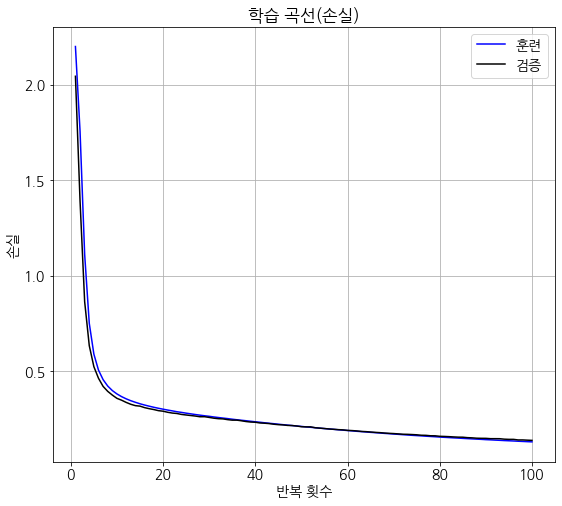

In [75]:
# 학습 곡선 출력(손실)
plt.plot(history2[:,0], history2[:,1], 'b', label='훈련')
plt.plot(history2[:,0], history2[:,3], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

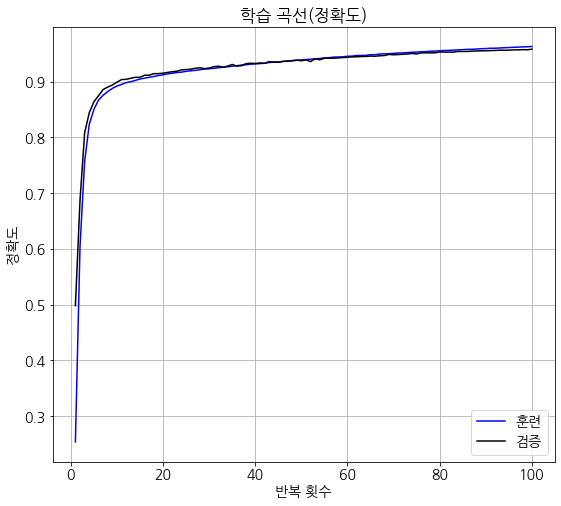

In [76]:
# 학습 곡선 출력(정확도)

plt.plot(history2[:,0], history2[:,2], 'b', label='훈련')
plt.plot(history2[:,0], history2[:,4], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()

## 칼럼 경사 소실과 ReLU 함수

In [77]:
# 모델 정의 -　시그모이드 함수 버전
# 784입력 10출력을 갖는 2개의 은닉층을 포함한 신경망

class Net3(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        
        # 첫번째 은닉층 정의(은닉층 노드 수: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 두번째 은닉층 정의(은닉층 노드 수: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # 출력층 정의
        self.l3 = nn.Linear(n_hidden, n_output)

        # 시그모이드 함수 정의
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        x3 = self.l2(x2)
        x4 = self.sigmoid(x3)
        x5 = self.l3(x4)
        return x5

In [78]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 초기화
net = Net3(n_input, n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [79]:
# 데이터로더에서 처음 한 세트 가져오기
for images, labels in test_loader:
    break

# 예측 결과 가져오기
inputs = images.to(device)
labels = labels.to(device)

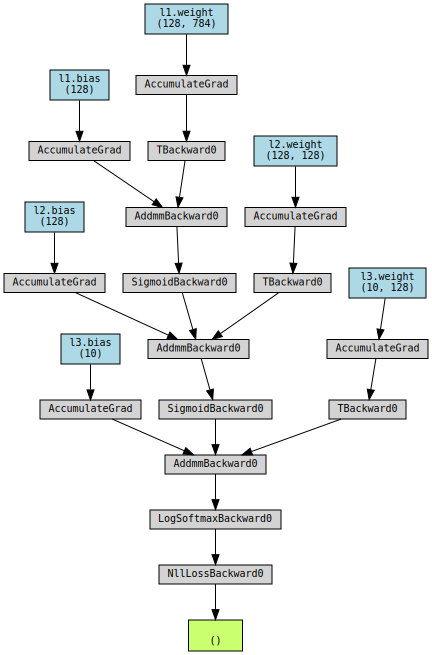

In [80]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels)

# 손실 계산 그래프 시각화
make_dot(loss, params=dict(net.named_parameters()))

In [81]:
# 경사 계산
loss.backward()

# 경사 계산 결과의 일부
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 각 요소의 절댓값 평균
print(np.abs(w).mean())

[[ 0.0001  0.0001  0.0001 ...  0.0001  0.0001  0.0001]
 [ 0.0001  0.0001  0.0001 ...  0.0001  0.0001  0.0001]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]
 ...
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]
 [ 0.0002  0.0002  0.0002 ...  0.0002  0.0002  0.0002]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]]
0.00017514595


## 칼럼 람다 표현식을 활용한 함수 정의

In [82]:
# 일반적인 함수의 정의

def f(x):
    return (2 * x**2 + 2)

In [83]:
x = np.arange(-2, 2.1, 0.25)
y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


In [84]:
# 람다 표현식으로 함수 정의

g = lambda x: 2 * x**2 + 2

In [85]:
y = g(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


## 칼럼 배치 사이즈와 정확도의 관계

### fit 함수의 정의

In [90]:
# 학습용 함수
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):
    base_epochs = len(history)
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        # 훈련 페이즈
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 경사 초기화
            optimizer.zero_grad()

            # 예측 계산
            outputs = net(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # 경사 계산
            loss.backward()

            # 파라미터 수정
            optimizer.step()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답 건수 산출
            train_acc += (predicted == labels).sum().item()

            # 훈련 데이터에 대해 손실과 정확도 계산
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        # 예측 페이즈
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)

            inputs = inputs.to(device)
            labels = labels.to(device)

            # 예측 계산
            outputs = net(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답 건수 산출
            val_acc += (predicted == labels).sum().item()

            # 검증 데이터에 대해 손실과 정확도 계산
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count
    
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
    return history

In [91]:
# 파이토치 난수 고정

def torch_seed(seed=123):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [92]:
# 미니 배치 사이즈 지정
batch_size_train = 500

# 훈련용 데이터로더
# 훈련용이므로 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 난수 고정
torch_seed()

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history6 = np.zeros((0,5))

In [93]:
history6 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history6)

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.00366 acc: 0.56960 val_loss: 0.00265, val_acc: 0.74660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.00208 acc: 0.79537 val_loss: 0.00159, val_acc: 0.83180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.00142 acc: 0.84110 val_loss: 0.00121, val_acc: 0.85850


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.00115 acc: 0.86057 val_loss: 0.00102, val_acc: 0.87140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.00100 acc: 0.87102 val_loss: 0.00092, val_acc: 0.87930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.00092 acc: 0.87877 val_loss: 0.00085, val_acc: 0.88650


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.00086 acc: 0.88327 val_loss: 0.00080, val_acc: 0.88970


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.00082 acc: 0.88743 val_loss: 0.00077, val_acc: 0.89370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.00078 acc: 0.89063 val_loss: 0.00074, val_acc: 0.89680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00076 acc: 0.89313 val_loss: 0.00071, val_acc: 0.89930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.00074 acc: 0.89593 val_loss: 0.00070, val_acc: 0.90160


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00072 acc: 0.89787 val_loss: 0.00068, val_acc: 0.90220


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.00070 acc: 0.89977 val_loss: 0.00067, val_acc: 0.90490


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.00069 acc: 0.90130 val_loss: 0.00066, val_acc: 0.90570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00068 acc: 0.90310 val_loss: 0.00065, val_acc: 0.90720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.00067 acc: 0.90412 val_loss: 0.00064, val_acc: 0.90790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.00066 acc: 0.90522 val_loss: 0.00063, val_acc: 0.90930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00065 acc: 0.90702 val_loss: 0.00062, val_acc: 0.91090


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00064 acc: 0.90808 val_loss: 0.00061, val_acc: 0.91190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00063 acc: 0.90902 val_loss: 0.00061, val_acc: 0.91240


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.00062 acc: 0.91033 val_loss: 0.00060, val_acc: 0.91520


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.00062 acc: 0.91098 val_loss: 0.00059, val_acc: 0.91430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00061 acc: 0.91193 val_loss: 0.00059, val_acc: 0.91560


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.00060 acc: 0.91320 val_loss: 0.00058, val_acc: 0.91780


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.00060 acc: 0.91405 val_loss: 0.00058, val_acc: 0.91710


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.00059 acc: 0.91493 val_loss: 0.00057, val_acc: 0.91820


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.00059 acc: 0.91660 val_loss: 0.00057, val_acc: 0.91960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00058 acc: 0.91695 val_loss: 0.00056, val_acc: 0.91990


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.00058 acc: 0.91798 val_loss: 0.00056, val_acc: 0.91950


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00057 acc: 0.91858 val_loss: 0.00055, val_acc: 0.92110


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00056 acc: 0.91957 val_loss: 0.00055, val_acc: 0.92190


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00056 acc: 0.92043 val_loss: 0.00055, val_acc: 0.92120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.00056 acc: 0.92070 val_loss: 0.00054, val_acc: 0.92200


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00055 acc: 0.92105 val_loss: 0.00054, val_acc: 0.92400


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00055 acc: 0.92240 val_loss: 0.00053, val_acc: 0.92440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.00054 acc: 0.92282 val_loss: 0.00053, val_acc: 0.92360


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00054 acc: 0.92348 val_loss: 0.00053, val_acc: 0.92440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.00053 acc: 0.92405 val_loss: 0.00052, val_acc: 0.92540


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.00053 acc: 0.92445 val_loss: 0.00052, val_acc: 0.92580


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.00052 acc: 0.92572 val_loss: 0.00051, val_acc: 0.92660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.00052 acc: 0.92600 val_loss: 0.00051, val_acc: 0.92640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.00051 acc: 0.92693 val_loss: 0.00051, val_acc: 0.92730


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.00051 acc: 0.92758 val_loss: 0.00050, val_acc: 0.92940


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.00051 acc: 0.92768 val_loss: 0.00050, val_acc: 0.92790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.00050 acc: 0.92842 val_loss: 0.00049, val_acc: 0.92930


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.00050 acc: 0.92933 val_loss: 0.00049, val_acc: 0.93070


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.00049 acc: 0.92967 val_loss: 0.00049, val_acc: 0.93100


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.00049 acc: 0.93035 val_loss: 0.00049, val_acc: 0.93060


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.00049 acc: 0.93058 val_loss: 0.00048, val_acc: 0.93220


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.00048 acc: 0.93143 val_loss: 0.00048, val_acc: 0.93250


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.00048 acc: 0.93208 val_loss: 0.00047, val_acc: 0.93300


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.00047 acc: 0.93230 val_loss: 0.00047, val_acc: 0.93290


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.00047 acc: 0.93347 val_loss: 0.00047, val_acc: 0.93330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.00047 acc: 0.93445 val_loss: 0.00046, val_acc: 0.93440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.00046 acc: 0.93478 val_loss: 0.00046, val_acc: 0.93460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.00046 acc: 0.93520 val_loss: 0.00046, val_acc: 0.93460


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.00045 acc: 0.93572 val_loss: 0.00045, val_acc: 0.93590


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.00045 acc: 0.93642 val_loss: 0.00045, val_acc: 0.93570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.00045 acc: 0.93697 val_loss: 0.00045, val_acc: 0.93600


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.00044 acc: 0.93747 val_loss: 0.00044, val_acc: 0.93640


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.00044 acc: 0.93803 val_loss: 0.00044, val_acc: 0.93720


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.00044 acc: 0.93837 val_loss: 0.00044, val_acc: 0.93780


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.00043 acc: 0.93895 val_loss: 0.00043, val_acc: 0.93710


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.00043 acc: 0.93965 val_loss: 0.00043, val_acc: 0.93900


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.00043 acc: 0.94007 val_loss: 0.00043, val_acc: 0.93830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.00042 acc: 0.94047 val_loss: 0.00042, val_acc: 0.93890


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.00042 acc: 0.94110 val_loss: 0.00042, val_acc: 0.93960


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.00042 acc: 0.94157 val_loss: 0.00042, val_acc: 0.94010


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00041 acc: 0.94210 val_loss: 0.00041, val_acc: 0.94000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00041 acc: 0.94242 val_loss: 0.00041, val_acc: 0.94000


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00041 acc: 0.94292 val_loss: 0.00041, val_acc: 0.94080


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.00040 acc: 0.94353 val_loss: 0.00041, val_acc: 0.94120


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00040 acc: 0.94370 val_loss: 0.00040, val_acc: 0.94110


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00040 acc: 0.94422 val_loss: 0.00040, val_acc: 0.94230


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.00040 acc: 0.94448 val_loss: 0.00040, val_acc: 0.94270


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00039 acc: 0.94513 val_loss: 0.00040, val_acc: 0.94280


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00039 acc: 0.94537 val_loss: 0.00039, val_acc: 0.94330


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.00039 acc: 0.94565 val_loss: 0.00039, val_acc: 0.94430


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.00038 acc: 0.94618 val_loss: 0.00039, val_acc: 0.94420


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.00038 acc: 0.94637 val_loss: 0.00039, val_acc: 0.94350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00038 acc: 0.94718 val_loss: 0.00038, val_acc: 0.94340


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00038 acc: 0.94737 val_loss: 0.00038, val_acc: 0.94470


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00037 acc: 0.94793 val_loss: 0.00038, val_acc: 0.94570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.00037 acc: 0.94815 val_loss: 0.00038, val_acc: 0.94480


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00037 acc: 0.94822 val_loss: 0.00037, val_acc: 0.94590


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00036 acc: 0.94887 val_loss: 0.00037, val_acc: 0.94620


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00036 acc: 0.94955 val_loss: 0.00037, val_acc: 0.94570


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00036 acc: 0.94978 val_loss: 0.00037, val_acc: 0.94700


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.00036 acc: 0.95020 val_loss: 0.00036, val_acc: 0.94690


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00035 acc: 0.95037 val_loss: 0.00036, val_acc: 0.94740


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00035 acc: 0.95100 val_loss: 0.00036, val_acc: 0.94790


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.00035 acc: 0.95113 val_loss: 0.00036, val_acc: 0.94800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00035 acc: 0.95143 val_loss: 0.00035, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.00035 acc: 0.95172 val_loss: 0.00035, val_acc: 0.94800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00034 acc: 0.95215 val_loss: 0.00035, val_acc: 0.94900


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00034 acc: 0.95277 val_loss: 0.00035, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00034 acc: 0.95272 val_loss: 0.00035, val_acc: 0.94830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.00034 acc: 0.95322 val_loss: 0.00035, val_acc: 0.94810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00033 acc: 0.95357 val_loss: 0.00034, val_acc: 0.94830


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.00033 acc: 0.95405 val_loss: 0.00034, val_acc: 0.94950


### batch_size=200

In [94]:
# 미니 배치 사이즈 지정
batch_size_train = 200

# 훈련용 데이터로더
# 훈련용이므로 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 난수 고정
torch_seed()

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history3 = np.zeros((0,5))

In [95]:
history3 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history3)

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.00650 acc: 0.71105 val_loss: 0.00136, val_acc: 0.84730


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.00282 acc: 0.86208 val_loss: 0.00092, val_acc: 0.87970


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.00220 acc: 0.88187 val_loss: 0.00078, val_acc: 0.89220


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.00195 acc: 0.89072 val_loss: 0.00072, val_acc: 0.89740


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.00182 acc: 0.89675 val_loss: 0.00068, val_acc: 0.90370


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.00172 acc: 0.90107 val_loss: 0.00065, val_acc: 0.90620


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.00166 acc: 0.90440 val_loss: 0.00063, val_acc: 0.91130


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.00160 acc: 0.90782 val_loss: 0.00061, val_acc: 0.91420


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.00155 acc: 0.91030 val_loss: 0.00059, val_acc: 0.91330


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00151 acc: 0.91280 val_loss: 0.00058, val_acc: 0.91760


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.00147 acc: 0.91477 val_loss: 0.00057, val_acc: 0.91950


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00144 acc: 0.91787 val_loss: 0.00056, val_acc: 0.92010


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.00141 acc: 0.91968 val_loss: 0.00054, val_acc: 0.92250


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.00138 acc: 0.92128 val_loss: 0.00053, val_acc: 0.92340


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00135 acc: 0.92295 val_loss: 0.00052, val_acc: 0.92460


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.00132 acc: 0.92455 val_loss: 0.00051, val_acc: 0.92550


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.00129 acc: 0.92610 val_loss: 0.00051, val_acc: 0.92800


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00127 acc: 0.92747 val_loss: 0.00050, val_acc: 0.92850


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00124 acc: 0.92932 val_loss: 0.00048, val_acc: 0.92980


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00122 acc: 0.93042 val_loss: 0.00048, val_acc: 0.93180


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.00119 acc: 0.93258 val_loss: 0.00047, val_acc: 0.93480


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.00117 acc: 0.93392 val_loss: 0.00046, val_acc: 0.93440


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00114 acc: 0.93512 val_loss: 0.00045, val_acc: 0.93550


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.00112 acc: 0.93653 val_loss: 0.00044, val_acc: 0.93600


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.00110 acc: 0.93828 val_loss: 0.00044, val_acc: 0.93720


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.00108 acc: 0.93915 val_loss: 0.00043, val_acc: 0.93700


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.00106 acc: 0.94057 val_loss: 0.00042, val_acc: 0.93950


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00103 acc: 0.94183 val_loss: 0.00041, val_acc: 0.94120


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.00101 acc: 0.94295 val_loss: 0.00041, val_acc: 0.94110


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00100 acc: 0.94403 val_loss: 0.00040, val_acc: 0.94180


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00098 acc: 0.94482 val_loss: 0.00039, val_acc: 0.94360


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00096 acc: 0.94623 val_loss: 0.00038, val_acc: 0.94470


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.00094 acc: 0.94722 val_loss: 0.00038, val_acc: 0.94580


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00093 acc: 0.94812 val_loss: 0.00037, val_acc: 0.94680


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00091 acc: 0.94865 val_loss: 0.00037, val_acc: 0.94740


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.00089 acc: 0.94988 val_loss: 0.00036, val_acc: 0.94600


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00088 acc: 0.95047 val_loss: 0.00035, val_acc: 0.94790


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.00086 acc: 0.95185 val_loss: 0.00035, val_acc: 0.94830


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.00085 acc: 0.95233 val_loss: 0.00035, val_acc: 0.94850


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.00084 acc: 0.95340 val_loss: 0.00034, val_acc: 0.94950


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.00082 acc: 0.95445 val_loss: 0.00034, val_acc: 0.94950


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.00081 acc: 0.95470 val_loss: 0.00033, val_acc: 0.95070


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.00080 acc: 0.95555 val_loss: 0.00033, val_acc: 0.95090


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.00079 acc: 0.95593 val_loss: 0.00032, val_acc: 0.95210


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.00077 acc: 0.95668 val_loss: 0.00032, val_acc: 0.95300


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.00076 acc: 0.95742 val_loss: 0.00032, val_acc: 0.95430


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.00075 acc: 0.95742 val_loss: 0.00031, val_acc: 0.95370


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.00074 acc: 0.95877 val_loss: 0.00031, val_acc: 0.95360


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.00073 acc: 0.95907 val_loss: 0.00030, val_acc: 0.95460


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.00072 acc: 0.95950 val_loss: 0.00030, val_acc: 0.95460


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.00071 acc: 0.96030 val_loss: 0.00030, val_acc: 0.95520


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.00070 acc: 0.96097 val_loss: 0.00030, val_acc: 0.95550


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.00069 acc: 0.96160 val_loss: 0.00029, val_acc: 0.95670


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.00068 acc: 0.96152 val_loss: 0.00029, val_acc: 0.95760


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.00067 acc: 0.96242 val_loss: 0.00028, val_acc: 0.95690


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.00066 acc: 0.96317 val_loss: 0.00028, val_acc: 0.95790


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.00065 acc: 0.96322 val_loss: 0.00028, val_acc: 0.95870


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.00065 acc: 0.96422 val_loss: 0.00028, val_acc: 0.95920


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.00064 acc: 0.96430 val_loss: 0.00027, val_acc: 0.95960


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.00063 acc: 0.96448 val_loss: 0.00027, val_acc: 0.96050


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.00062 acc: 0.96487 val_loss: 0.00027, val_acc: 0.96070


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.00062 acc: 0.96563 val_loss: 0.00027, val_acc: 0.96180


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.00061 acc: 0.96608 val_loss: 0.00026, val_acc: 0.96160


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.00060 acc: 0.96665 val_loss: 0.00026, val_acc: 0.96220


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.00059 acc: 0.96703 val_loss: 0.00026, val_acc: 0.96270


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.00059 acc: 0.96772 val_loss: 0.00026, val_acc: 0.96280


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.00058 acc: 0.96780 val_loss: 0.00026, val_acc: 0.96290


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.00057 acc: 0.96788 val_loss: 0.00025, val_acc: 0.96340


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00057 acc: 0.96883 val_loss: 0.00025, val_acc: 0.96410


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00056 acc: 0.96880 val_loss: 0.00025, val_acc: 0.96460


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00055 acc: 0.96892 val_loss: 0.00024, val_acc: 0.96410


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.00055 acc: 0.96985 val_loss: 0.00025, val_acc: 0.96420


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00054 acc: 0.96997 val_loss: 0.00024, val_acc: 0.96530


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00054 acc: 0.97038 val_loss: 0.00024, val_acc: 0.96510


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.00053 acc: 0.97085 val_loss: 0.00024, val_acc: 0.96560


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00052 acc: 0.97120 val_loss: 0.00024, val_acc: 0.96580


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00052 acc: 0.97132 val_loss: 0.00023, val_acc: 0.96650


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.00051 acc: 0.97163 val_loss: 0.00023, val_acc: 0.96630


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.00051 acc: 0.97180 val_loss: 0.00023, val_acc: 0.96630


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.00050 acc: 0.97210 val_loss: 0.00023, val_acc: 0.96670


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00050 acc: 0.97235 val_loss: 0.00023, val_acc: 0.96670


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00049 acc: 0.97263 val_loss: 0.00023, val_acc: 0.96710


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00049 acc: 0.97315 val_loss: 0.00023, val_acc: 0.96770


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.00048 acc: 0.97365 val_loss: 0.00022, val_acc: 0.96700


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00048 acc: 0.97352 val_loss: 0.00022, val_acc: 0.96810


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00047 acc: 0.97408 val_loss: 0.00022, val_acc: 0.96780


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00047 acc: 0.97428 val_loss: 0.00022, val_acc: 0.96830


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00046 acc: 0.97463 val_loss: 0.00022, val_acc: 0.96860


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.00046 acc: 0.97493 val_loss: 0.00021, val_acc: 0.96830


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00045 acc: 0.97517 val_loss: 0.00021, val_acc: 0.96840


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00045 acc: 0.97508 val_loss: 0.00021, val_acc: 0.96900


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.00045 acc: 0.97558 val_loss: 0.00021, val_acc: 0.96910


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00044 acc: 0.97597 val_loss: 0.00021, val_acc: 0.96880


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.00044 acc: 0.97575 val_loss: 0.00021, val_acc: 0.96880


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00043 acc: 0.97620 val_loss: 0.00021, val_acc: 0.96850


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00043 acc: 0.97655 val_loss: 0.00021, val_acc: 0.96950


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00043 acc: 0.97708 val_loss: 0.00021, val_acc: 0.97020


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.00042 acc: 0.97718 val_loss: 0.00021, val_acc: 0.96970


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00042 acc: 0.97700 val_loss: 0.00020, val_acc: 0.97040


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.00041 acc: 0.97753 val_loss: 0.00020, val_acc: 0.96990


### batch_size=100

In [96]:
# 미니 배치 사이즈 지정
batch_size_train = 100

# 훈련용 데이터로더
# 훈련용이므로 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 난수 고정
torch_seed()

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history4 = np.zeros((0,5))

In [97]:
history4 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history4)

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.00934 acc: 0.78320 val_loss: 0.00092, val_acc: 0.87920


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.00417 acc: 0.88513 val_loss: 0.00072, val_acc: 0.89870


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.00356 acc: 0.89830 val_loss: 0.00065, val_acc: 0.90800


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.00328 acc: 0.90545 val_loss: 0.00061, val_acc: 0.91020


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.00308 acc: 0.91092 val_loss: 0.00058, val_acc: 0.91770


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.00293 acc: 0.91598 val_loss: 0.00056, val_acc: 0.91800


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.00280 acc: 0.91938 val_loss: 0.00054, val_acc: 0.92420


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.00268 acc: 0.92295 val_loss: 0.00052, val_acc: 0.92700


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.00257 acc: 0.92580 val_loss: 0.00050, val_acc: 0.92730


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00246 acc: 0.92957 val_loss: 0.00048, val_acc: 0.93180


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.00236 acc: 0.93223 val_loss: 0.00046, val_acc: 0.93610


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00227 acc: 0.93642 val_loss: 0.00044, val_acc: 0.93600


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.00218 acc: 0.93800 val_loss: 0.00043, val_acc: 0.93760


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.00209 acc: 0.94073 val_loss: 0.00041, val_acc: 0.93890


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00201 acc: 0.94327 val_loss: 0.00040, val_acc: 0.94160


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.00194 acc: 0.94502 val_loss: 0.00038, val_acc: 0.94380


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.00187 acc: 0.94728 val_loss: 0.00038, val_acc: 0.94600


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00181 acc: 0.94937 val_loss: 0.00036, val_acc: 0.94630


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00175 acc: 0.95088 val_loss: 0.00035, val_acc: 0.94910


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00169 acc: 0.95245 val_loss: 0.00034, val_acc: 0.95060


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.00164 acc: 0.95425 val_loss: 0.00033, val_acc: 0.95090


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.00159 acc: 0.95558 val_loss: 0.00032, val_acc: 0.95210


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00154 acc: 0.95680 val_loss: 0.00032, val_acc: 0.95340


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.00150 acc: 0.95787 val_loss: 0.00031, val_acc: 0.95340


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.00146 acc: 0.95937 val_loss: 0.00030, val_acc: 0.95550


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.00142 acc: 0.96005 val_loss: 0.00030, val_acc: 0.95620


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.00138 acc: 0.96138 val_loss: 0.00029, val_acc: 0.95680


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00134 acc: 0.96213 val_loss: 0.00028, val_acc: 0.95810


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.00131 acc: 0.96308 val_loss: 0.00028, val_acc: 0.95870


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00128 acc: 0.96405 val_loss: 0.00027, val_acc: 0.96070


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00124 acc: 0.96482 val_loss: 0.00026, val_acc: 0.96130


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00122 acc: 0.96578 val_loss: 0.00026, val_acc: 0.96180


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.00119 acc: 0.96682 val_loss: 0.00025, val_acc: 0.96240


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00116 acc: 0.96772 val_loss: 0.00025, val_acc: 0.96350


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00113 acc: 0.96822 val_loss: 0.00024, val_acc: 0.96370


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.00111 acc: 0.96903 val_loss: 0.00024, val_acc: 0.96400


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00108 acc: 0.96992 val_loss: 0.00024, val_acc: 0.96530


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.00106 acc: 0.97032 val_loss: 0.00024, val_acc: 0.96480


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.00104 acc: 0.97110 val_loss: 0.00023, val_acc: 0.96640


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.00102 acc: 0.97173 val_loss: 0.00023, val_acc: 0.96580


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.00099 acc: 0.97227 val_loss: 0.00023, val_acc: 0.96670


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.00098 acc: 0.97313 val_loss: 0.00022, val_acc: 0.96790


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.00096 acc: 0.97330 val_loss: 0.00022, val_acc: 0.96770


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.00094 acc: 0.97425 val_loss: 0.00022, val_acc: 0.96860


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.00092 acc: 0.97460 val_loss: 0.00021, val_acc: 0.96820


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.00090 acc: 0.97495 val_loss: 0.00022, val_acc: 0.96680


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.00089 acc: 0.97585 val_loss: 0.00021, val_acc: 0.96900


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.00087 acc: 0.97618 val_loss: 0.00021, val_acc: 0.96920


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.00086 acc: 0.97625 val_loss: 0.00020, val_acc: 0.97040


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.00084 acc: 0.97703 val_loss: 0.00021, val_acc: 0.96990


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.00082 acc: 0.97745 val_loss: 0.00020, val_acc: 0.97030


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.00081 acc: 0.97777 val_loss: 0.00020, val_acc: 0.97060


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.00079 acc: 0.97827 val_loss: 0.00020, val_acc: 0.97160


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.00078 acc: 0.97863 val_loss: 0.00020, val_acc: 0.97140


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.00077 acc: 0.97912 val_loss: 0.00019, val_acc: 0.97150


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.00075 acc: 0.97958 val_loss: 0.00019, val_acc: 0.97160


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.00074 acc: 0.98015 val_loss: 0.00019, val_acc: 0.97110


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.00073 acc: 0.98042 val_loss: 0.00019, val_acc: 0.97110


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.00072 acc: 0.98033 val_loss: 0.00019, val_acc: 0.97220


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.00071 acc: 0.98130 val_loss: 0.00018, val_acc: 0.97270


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.00070 acc: 0.98127 val_loss: 0.00018, val_acc: 0.97250


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.00069 acc: 0.98175 val_loss: 0.00018, val_acc: 0.97300


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.00068 acc: 0.98217 val_loss: 0.00018, val_acc: 0.97230


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.00067 acc: 0.98218 val_loss: 0.00018, val_acc: 0.97270


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.00065 acc: 0.98258 val_loss: 0.00018, val_acc: 0.97290


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.00064 acc: 0.98287 val_loss: 0.00018, val_acc: 0.97270


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.00063 acc: 0.98310 val_loss: 0.00018, val_acc: 0.97340


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.00063 acc: 0.98333 val_loss: 0.00017, val_acc: 0.97340


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00062 acc: 0.98380 val_loss: 0.00017, val_acc: 0.97290


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00061 acc: 0.98355 val_loss: 0.00017, val_acc: 0.97430


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00060 acc: 0.98377 val_loss: 0.00017, val_acc: 0.97390


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.00059 acc: 0.98460 val_loss: 0.00017, val_acc: 0.97320


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00058 acc: 0.98440 val_loss: 0.00017, val_acc: 0.97360


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00057 acc: 0.98475 val_loss: 0.00017, val_acc: 0.97470


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.00056 acc: 0.98492 val_loss: 0.00017, val_acc: 0.97470


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00056 acc: 0.98513 val_loss: 0.00017, val_acc: 0.97440


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00055 acc: 0.98548 val_loss: 0.00017, val_acc: 0.97420


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.00054 acc: 0.98593 val_loss: 0.00016, val_acc: 0.97480


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.00053 acc: 0.98612 val_loss: 0.00016, val_acc: 0.97410


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.00053 acc: 0.98628 val_loss: 0.00016, val_acc: 0.97610


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00052 acc: 0.98640 val_loss: 0.00016, val_acc: 0.97520


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00051 acc: 0.98682 val_loss: 0.00016, val_acc: 0.97540


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00051 acc: 0.98688 val_loss: 0.00016, val_acc: 0.97490


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.00050 acc: 0.98715 val_loss: 0.00016, val_acc: 0.97500


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00049 acc: 0.98728 val_loss: 0.00016, val_acc: 0.97570


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00049 acc: 0.98755 val_loss: 0.00016, val_acc: 0.97520


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00048 acc: 0.98807 val_loss: 0.00016, val_acc: 0.97540


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00048 acc: 0.98785 val_loss: 0.00016, val_acc: 0.97660


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.00047 acc: 0.98825 val_loss: 0.00016, val_acc: 0.97520


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00046 acc: 0.98848 val_loss: 0.00016, val_acc: 0.97590


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00046 acc: 0.98863 val_loss: 0.00016, val_acc: 0.97620


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.00045 acc: 0.98857 val_loss: 0.00016, val_acc: 0.97630


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00045 acc: 0.98888 val_loss: 0.00015, val_acc: 0.97660


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.00044 acc: 0.98907 val_loss: 0.00015, val_acc: 0.97560


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00044 acc: 0.98900 val_loss: 0.00015, val_acc: 0.97600


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00043 acc: 0.98918 val_loss: 0.00015, val_acc: 0.97670


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00042 acc: 0.98935 val_loss: 0.00015, val_acc: 0.97720


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.00042 acc: 0.98987 val_loss: 0.00015, val_acc: 0.97590


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00041 acc: 0.98983 val_loss: 0.00015, val_acc: 0.97720


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.00041 acc: 0.99010 val_loss: 0.00015, val_acc: 0.97690


### batch_size=50

In [98]:
# 미니 배치 사이즈 지정
batch_size_train = 50

# 훈련용 데이터로더
# 훈련용이므로 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 난수 고정
torch_seed()

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history5 = np.zeros((0,5))

In [99]:
history5 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history5)

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.01363 acc: 0.82922 val_loss: 0.00072, val_acc: 0.89640


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.00693 acc: 0.89977 val_loss: 0.00062, val_acc: 0.91150


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.00610 acc: 0.91163 val_loss: 0.00056, val_acc: 0.91790


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.00555 acc: 0.92003 val_loss: 0.00052, val_acc: 0.92360


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.00510 acc: 0.92607 val_loss: 0.00048, val_acc: 0.93170


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.00468 acc: 0.93313 val_loss: 0.00046, val_acc: 0.93390


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.00432 acc: 0.93790 val_loss: 0.00041, val_acc: 0.94210


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.00400 acc: 0.94297 val_loss: 0.00038, val_acc: 0.94290


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.00372 acc: 0.94728 val_loss: 0.00037, val_acc: 0.94650


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00347 acc: 0.95122 val_loss: 0.00034, val_acc: 0.94860


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.00326 acc: 0.95383 val_loss: 0.00033, val_acc: 0.95090


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00308 acc: 0.95667 val_loss: 0.00031, val_acc: 0.95480


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.00291 acc: 0.95898 val_loss: 0.00029, val_acc: 0.95600


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.00276 acc: 0.96135 val_loss: 0.00028, val_acc: 0.95880


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00261 acc: 0.96340 val_loss: 0.00027, val_acc: 0.96070


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.00250 acc: 0.96450 val_loss: 0.00026, val_acc: 0.96200


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.00238 acc: 0.96605 val_loss: 0.00027, val_acc: 0.96200


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00228 acc: 0.96802 val_loss: 0.00024, val_acc: 0.96350


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00218 acc: 0.96940 val_loss: 0.00024, val_acc: 0.96470


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00210 acc: 0.97015 val_loss: 0.00022, val_acc: 0.96720


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.00201 acc: 0.97193 val_loss: 0.00022, val_acc: 0.96630


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.00194 acc: 0.97300 val_loss: 0.00022, val_acc: 0.96710


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00186 acc: 0.97435 val_loss: 0.00022, val_acc: 0.96720


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.00179 acc: 0.97502 val_loss: 0.00022, val_acc: 0.96750


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.00174 acc: 0.97583 val_loss: 0.00021, val_acc: 0.96900


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.00167 acc: 0.97708 val_loss: 0.00020, val_acc: 0.97110


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.00161 acc: 0.97745 val_loss: 0.00020, val_acc: 0.97080


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00156 acc: 0.97842 val_loss: 0.00019, val_acc: 0.97280


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.00151 acc: 0.97925 val_loss: 0.00019, val_acc: 0.97200


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00146 acc: 0.97978 val_loss: 0.00018, val_acc: 0.97310


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00141 acc: 0.98037 val_loss: 0.00018, val_acc: 0.97370


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00137 acc: 0.98108 val_loss: 0.00018, val_acc: 0.97220


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.00133 acc: 0.98177 val_loss: 0.00018, val_acc: 0.97320


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00129 acc: 0.98230 val_loss: 0.00017, val_acc: 0.97340


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00126 acc: 0.98308 val_loss: 0.00017, val_acc: 0.97480


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.00122 acc: 0.98327 val_loss: 0.00017, val_acc: 0.97430


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00119 acc: 0.98468 val_loss: 0.00017, val_acc: 0.97490


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.00115 acc: 0.98458 val_loss: 0.00017, val_acc: 0.97410


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.00112 acc: 0.98483 val_loss: 0.00017, val_acc: 0.97480


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.00109 acc: 0.98538 val_loss: 0.00016, val_acc: 0.97490


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.00106 acc: 0.98600 val_loss: 0.00016, val_acc: 0.97460


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.00104 acc: 0.98608 val_loss: 0.00016, val_acc: 0.97620


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.00101 acc: 0.98653 val_loss: 0.00016, val_acc: 0.97530


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.00099 acc: 0.98725 val_loss: 0.00016, val_acc: 0.97650


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.00096 acc: 0.98760 val_loss: 0.00015, val_acc: 0.97660


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.00094 acc: 0.98802 val_loss: 0.00016, val_acc: 0.97530


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.00092 acc: 0.98812 val_loss: 0.00016, val_acc: 0.97530


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.00090 acc: 0.98827 val_loss: 0.00015, val_acc: 0.97650


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.00087 acc: 0.98895 val_loss: 0.00015, val_acc: 0.97700


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.00085 acc: 0.98937 val_loss: 0.00015, val_acc: 0.97810


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.00083 acc: 0.98962 val_loss: 0.00015, val_acc: 0.97680


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.00081 acc: 0.98980 val_loss: 0.00015, val_acc: 0.97800


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.00079 acc: 0.99013 val_loss: 0.00015, val_acc: 0.97740


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.00078 acc: 0.99048 val_loss: 0.00015, val_acc: 0.97740


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.00076 acc: 0.99097 val_loss: 0.00015, val_acc: 0.97760


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.00074 acc: 0.99098 val_loss: 0.00015, val_acc: 0.97800


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.00073 acc: 0.99153 val_loss: 0.00014, val_acc: 0.97920


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.00071 acc: 0.99135 val_loss: 0.00014, val_acc: 0.97840


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.00070 acc: 0.99152 val_loss: 0.00014, val_acc: 0.97840


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.00068 acc: 0.99187 val_loss: 0.00014, val_acc: 0.97930


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.00067 acc: 0.99197 val_loss: 0.00015, val_acc: 0.97850


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.00065 acc: 0.99247 val_loss: 0.00014, val_acc: 0.97790


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.00064 acc: 0.99270 val_loss: 0.00014, val_acc: 0.97850


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.00063 acc: 0.99310 val_loss: 0.00014, val_acc: 0.97800


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.00061 acc: 0.99313 val_loss: 0.00014, val_acc: 0.97900


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.00060 acc: 0.99307 val_loss: 0.00014, val_acc: 0.97800


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.00059 acc: 0.99320 val_loss: 0.00014, val_acc: 0.97810


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.00057 acc: 0.99358 val_loss: 0.00014, val_acc: 0.97860


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00056 acc: 0.99373 val_loss: 0.00014, val_acc: 0.97840


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00055 acc: 0.99402 val_loss: 0.00014, val_acc: 0.97890


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00054 acc: 0.99412 val_loss: 0.00014, val_acc: 0.97930


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.00053 acc: 0.99425 val_loss: 0.00014, val_acc: 0.97840


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00052 acc: 0.99462 val_loss: 0.00014, val_acc: 0.97880


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00051 acc: 0.99455 val_loss: 0.00014, val_acc: 0.97870


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.00050 acc: 0.99488 val_loss: 0.00014, val_acc: 0.97850


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00049 acc: 0.99462 val_loss: 0.00014, val_acc: 0.97810


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00048 acc: 0.99490 val_loss: 0.00014, val_acc: 0.97950


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.00047 acc: 0.99515 val_loss: 0.00013, val_acc: 0.97860


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.00046 acc: 0.99530 val_loss: 0.00014, val_acc: 0.97800


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.00045 acc: 0.99565 val_loss: 0.00014, val_acc: 0.97950


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00045 acc: 0.99548 val_loss: 0.00013, val_acc: 0.97900


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00044 acc: 0.99583 val_loss: 0.00013, val_acc: 0.97940


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00043 acc: 0.99597 val_loss: 0.00014, val_acc: 0.97810


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.00042 acc: 0.99620 val_loss: 0.00014, val_acc: 0.97850


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00041 acc: 0.99638 val_loss: 0.00013, val_acc: 0.97890


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00040 acc: 0.99642 val_loss: 0.00014, val_acc: 0.97850


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00040 acc: 0.99622 val_loss: 0.00014, val_acc: 0.97860


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00039 acc: 0.99628 val_loss: 0.00013, val_acc: 0.97880


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.00038 acc: 0.99650 val_loss: 0.00013, val_acc: 0.97950


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00037 acc: 0.99675 val_loss: 0.00013, val_acc: 0.97900


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00037 acc: 0.99675 val_loss: 0.00014, val_acc: 0.97830


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.00036 acc: 0.99720 val_loss: 0.00014, val_acc: 0.97940


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00036 acc: 0.99712 val_loss: 0.00013, val_acc: 0.97900


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.00035 acc: 0.99710 val_loss: 0.00014, val_acc: 0.97980


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00035 acc: 0.99725 val_loss: 0.00013, val_acc: 0.97870


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00034 acc: 0.99748 val_loss: 0.00014, val_acc: 0.97840


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00033 acc: 0.99755 val_loss: 0.00013, val_acc: 0.97920


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.00033 acc: 0.99750 val_loss: 0.00014, val_acc: 0.97840


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00032 acc: 0.99765 val_loss: 0.00013, val_acc: 0.98020


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.00031 acc: 0.99772 val_loss: 0.00013, val_acc: 0.97990


### 학습 곡선 비교

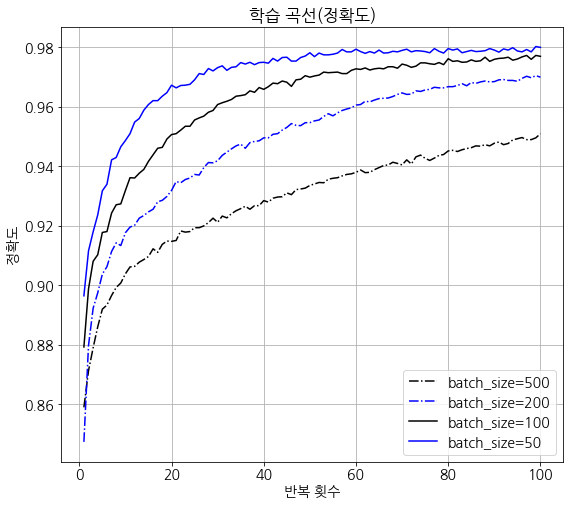

In [100]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,4], label='batch_size=500', c='k', linestyle='-.')
plt.plot(history3[:,0], history3[:,4], label='batch_size=200', c='b', linestyle='-.')
plt.plot(history4[:,0], history4[:,4], label='batch_size=100', c='k')
plt.plot(history5[:,0], history5[:,4], label='batch_size=50', c='b')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()